# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/srv/scratch/z3289452/miniconda3/envs/OceanDataScience/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_1953_2010.csv")

In [3]:
rawdat.columns

Index(['SURVEY_NAME', 'STATION_NO', 'START_TIME', 'END_TIME', 'MIN_DEPTH',
       'MAX_DEPTH', 'BOTTTOM_DEPTH', 'BOTTOM_TIME', 'BOTTOM_LAT', 'BOTTOM_LON',
       'END_LAT', 'END_LON', 'START_LAT', 'START_LON', 'PROJECT_NAME',
       'MARLIN_ID', 'BOTTLE_NUMBER', 'PRESSURE', 'ROSETTE_POSITION',
       'ROSETTE_POSITION_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG',
       'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG',
       'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SALINITY_VALUE',
       'SALINITY_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG',
       'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'AMMONIA_VALUE',
       'AMMONIA_QC_FLAG'],
      dtype='object')

In [4]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['START_TIME', 'PRESSURE', 'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG', 
                 'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG', 'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG', 
                 'AMMONIA_VALUE', 'AMMONIA_QC_FLAG']]
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,< 0.02,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [5]:
rawdat.NITRATE_VALUE = rawdat.NITRATE_VALUE.where(rawdat.NITRATE_VALUE != '< 0.02', '0')
rawdat.NITRATE_VALUE = pd.to_numeric(rawdat.NITRATE_VALUE)
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [6]:
rawdat.START_TIME = pd.to_datetime(rawdat.START_TIME, infer_datetime_format=True, dayfirst=True)
start_time = rawdat.START_TIME
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,1953-05-31,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,1953-05-31,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,1953-05-31,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,1953-05-31,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,1953-05-31,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [7]:
nitrate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate.dropna(inplace=True)
nitrate = nitrate[(nitrate.NITRATE_QC_FLAG == 0.0) & (nitrate.TEMPERATURE_QC_FLAG == 0.0) & (nitrate.SALINITY_QC_FLAG == 0.0) & (nitrate.OXYGEN_QC_FLAG == 0.0) &
                 (nitrate.PRESSURE <= 100)]
nitrate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
nitrate.head(), nitrate.shape

(   START_TIME  PRESSURE  TEMPERATURE_VALUE  SALINITY_VALUE  NITRATE_VALUE  \
 1  1953-05-31      10.0               18.6          35.371            0.1   
 3  1953-05-31      30.0               18.8          35.462            1.2   
 6  1953-05-31      75.0               17.1          35.480            3.1   
 7  1953-05-31     100.0               16.2          35.570            6.7   
 10 1953-06-09      20.0               18.0          35.389            0.2   
 
     OXYGEN_VALUE  
 1         242.13  
 3         238.55  
 6         218.00  
 7         197.45  
 10        230.06  , (10638, 6))

In [8]:
nitrate.describe()

,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,44.104512,17.418458,35.463542,3.734793,217.009770
std,29.526670,2.263967,0.158053,3.640728,23.267731
min,0.000000,11.600000,31.924000,0.060000,109.900000
25%,20.000000,15.780000,35.389000,0.700000,198.350000
50%,40.000000,17.120000,35.479000,2.300000,222.020000
75%,70.000000,18.790000,35.556000,6.300000,234.530000
max,100.000000,25.230000,35.967000,25.800000,305.120000


In [9]:
pressure = nitrate.PRESSURE.unique()
pressure.sort()
pressure

array([  0. ,   8. ,   9. ,  10. ,  15. ,  17. ,  18. ,  19. ,  20. ,
        22. ,  23. ,  24. ,  25. ,  27. ,  28. ,  29. ,  30. ,  32. ,
        33. ,  36. ,  37. ,  38. ,  39. ,  40. ,  41. ,  42. ,  44. ,
        45. ,  46. ,  47. ,  47.5,  48. ,  48.1,  49. ,  49.9,  50. ,
        52. ,  52.2,  53. ,  54. ,  55. ,  55.2,  55.6,  56. ,  57. ,
        58. ,  59. ,  60. ,  61. ,  62. ,  63. ,  64. ,  65. ,  66. ,
        67. ,  68. ,  69. ,  70. ,  71. ,  72. ,  72.8,  73. ,  73.3,
        73.8,  74. ,  74.6,  75. ,  75.3,  75.7,  76. ,  76.2,  77. ,
        77.1,  77.4,  78. ,  79. ,  80. ,  83.2,  85. ,  88. ,  89. ,
        90. ,  91.8,  92. ,  93. ,  94. ,  95. ,  96. ,  96.6,  97. ,
        98. ,  99. ,  99.7,  99.8, 100. ])

In [10]:
nitrate.START_TIME.iloc[np.where(nitrate.START_TIME.dt.hour != 0)]
# All measurements are basically at midnight
# we can resample to daily bins

13783   1984-10-31 23:12:00
13784   1984-10-31 23:12:00
13785   1984-10-31 23:12:00
13786   1984-10-31 23:12:00
13787   1984-10-31 23:12:00
13788   1984-10-31 23:12:00
Name: START_TIME, dtype: datetime64[ns]

In [11]:
nitrate

,START_TIME,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
1,1953-05-31,10.0,18.600,35.371,0.10,242.13
3,1953-05-31,30.0,18.800,35.462,1.20,238.55
6,1953-05-31,75.0,17.100,35.480,3.10,218.00
7,1953-05-31,100.0,16.200,35.570,6.70,197.45
10,1953-06-09,20.0,18.000,35.389,0.20,230.06
...,...,...,...,...,...,...
13857,1985-01-01,20.0,20.397,35.656,0.09,228.48
13858,1985-01-01,30.0,20.238,35.655,0.13,230.11
13859,1985-01-01,40.0,20.055,35.684,0.13,231.19
13860,1985-01-01,48.1,19.886,35.668,0.13,232.83


In [12]:
nitrate = nitrate.set_index(['START_TIME'])

In [13]:
print(nitrate.groupby('PRESSURE').count().to_string())
# Most measurements are at pressure levels 0 10 20 30 40 50 60 70 75 80 100
# We will create 10dbar bins around these values

          TEMPERATURE_VALUE  SALINITY_VALUE  NITRATE_VALUE  OXYGEN_VALUE
PRESSURE                                                                
0.0                    1162            1162           1162          1162
8.0                       2               2              2             2
9.0                       4               4              4             4
10.0                    992             992            992           992
15.0                      1               1              1             1
17.0                      2               2              2             2
18.0                      3               3              3             3
19.0                      8               8              8             8
20.0                   1019            1019           1019          1019
22.0                      2               2              2             2
23.0                      4               4              4             4
24.0                      4               4        

In [41]:
bins = [0,5,15,25,35,45,55,65,75,85,95,105]
labs = [0,10,20,30,40,50,60,70,80,90,100]

In [42]:
nitrate['PRESSURE_BIN'] = pd.cut(nitrate.PRESSURE, bins = bins, labels = labs)

In [43]:
nitrate = nitrate.groupby('PRESSURE_BIN').resample('1D').mean().drop(columns=['PRESSURE','PRESSURE_BIN']).dropna()

In [44]:
nitrate.groupby('PRESSURE_BIN').count()

,index,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
PRESSURE_BIN,,,,,
10,998,998,998,998,998
20,1095,1095,1095,1095,1095
30,1086,1086,1086,1086,1086
40,1156,1156,1156,1156,1156
50,1290,1290,1290,1290,1290
60,733,733,733,733,733
70,1308,1308,1308,1308,1308
80,692,692,692,692,692
90,25,25,25,25,25


In [18]:
nitrate.xs(10)
# print(nitrate.xs(10).index.tolist())

,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
START_TIME,,,,
1953-05-31,18.600,35.371,0.10,242.13
1953-06-29,17.600,35.498,3.60,248.38
1953-07-05,17.200,35.462,4.30,246.15
1953-07-14,17.000,35.552,3.20,242.13
1953-09-03,16.000,35.534,2.80,248.83
...,...,...,...,...
1984-11-11,20.150,35.662,0.11,229.81
1984-11-18,20.595,35.414,0.06,231.17
1984-11-25,20.703,35.117,0.06,227.36


In [19]:
Temp10 = nitrate.xs(10).TEMPERATURE_VALUE

In [20]:
Time_diff = nitrate.xs(10).index.to_series().diff()

In [21]:
Time_diff[1].total_seconds()/3600/24

29.0

In [22]:
np.nanmax(Time_diff/pd.Timedelta('1 Day'))

350.0

In [23]:
type(Temp10)

pandas.core.series.Series

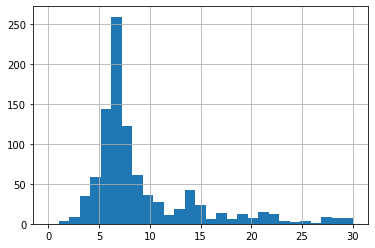

In [24]:
(Time_diff/pd.Timedelta(days=1)).hist(bins=np.linspace(0,30,30))

In [25]:
for x in np.arange(10, 101, 10):
    print(np.where(nitrate.xs(x).index.to_series().diff() > pd.Timedelta(10, unit='D'))[0].shape)

(270,)
(265,)
(268,)
(264,)
(243,)
(115,)
(243,)
(140,)
(23,)
(255,)


In [54]:
nitrate = nitrate.reset_index()
nitrate = nitrate.set_index('START_TIME')
nitrate = nitrate.groupby('PRESSURE_BIN').resample('W').mean().drop(columns=['index','PRESSURE_BIN'])

In [46]:
Time_diff = nitrate.dropna().xs(10).index.to_series().diff()

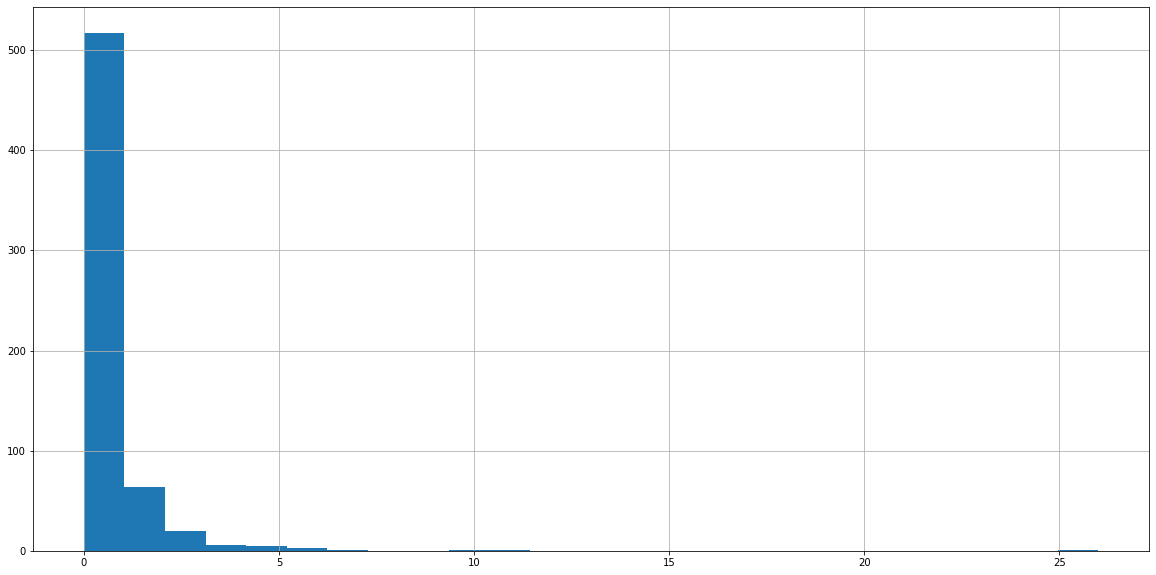

In [31]:
(Time_diff/pd.Timedelta(days=14)).hist(bins=np.linspace(0,26,26), figsize=(20,10))

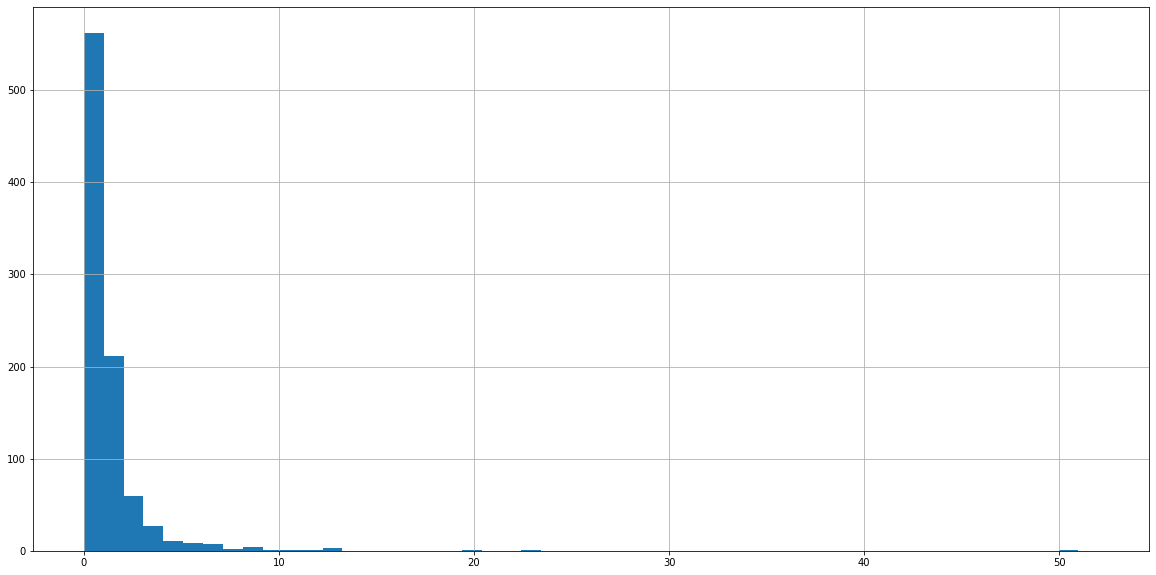

In [52]:
(Time_diff/pd.Timedelta(days=7)).hist(bins=np.linspace(0,52,52), figsize=(20,10))

In [62]:
nitrate_10 = nitrate.xs(10)[['TEMPERATURE_VALUE']]

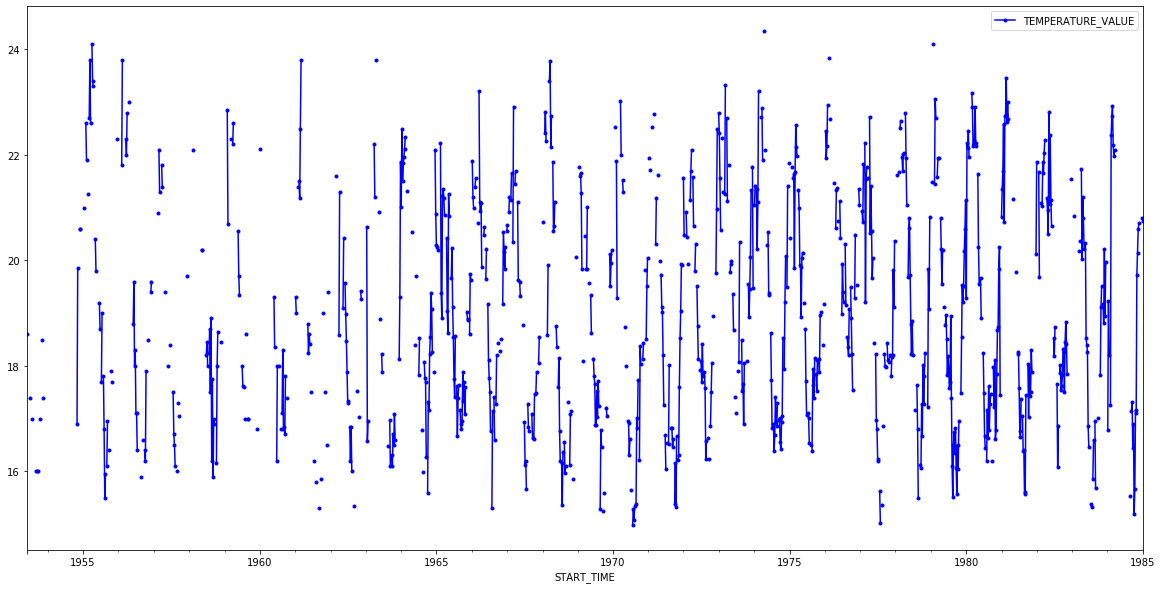

In [63]:
nitrate_10.plot(style=['.b-'],figsize=(20,10))

In [81]:
nitrate_10

,TEMPERATURE_VALUE,RUN
START_TIME,,
1953-05-31,18.600,0.0
1953-06-07,NaN,NaN
1953-06-14,NaN,NaN
1953-06-21,NaN,NaN
1953-06-28,NaN,NaN
...,...,...
1984-12-09,NaN,NaN
1984-12-16,NaN,NaN
1984-12-23,20.797,NaN


In [67]:
nitrate_10.dropna().shape
# only around 900 timesteps of non NaN data

(904, 1)

In [71]:
nitrate_10.index.to_series().diff()

START_TIME
1953-05-31      NaT
1953-06-07   7 days
1953-06-14   7 days
1953-06-21   7 days
1953-06-28   7 days
              ...  
1984-12-09   7 days
1984-12-16   7 days
1984-12-23   7 days
1984-12-30   7 days
1985-01-06   7 days
Name: START_TIME, Length: 1650, dtype: timedelta64[ns]

In [98]:
nonna = np.where(~np.isnan(nitrate_10.TEMPERATURE_VALUE))[0]

In [125]:
nonna

array([   0,    5,    7,   14,   15,   16,   19,   22,   24,   74,   75,
         78,   79,   85,   87,   88,   90,   92,   93,   94,   96,   97,
         98,  101,  102,  107,  108,  110,  111,  113,  114,  115,  116,
        118,  119,  121,  124,  126,  133,  140,  141,  146,  147,  148,
        151,  157,  158,  159,  160,  161,  162,  163,  169,  171,  174,
        175,  176,  179,  183,  184,  193,  195,  196,  199,  200,  204,
        208,  212,  216,  217,  218,  219,  221,  223,  225,  236,  245,
        258,  259,  265,  266,  267,  269,  270,  271,  272,  273,  274,
        275,  276,  277,  280,  281,  282,  287,  296,  297,  302,  304,
        305,  312,  313,  314,  318,  319,  320,  322,  324,  326,  327,
        340,  345,  365,  366,  369,  370,  373,  375,  377,  378,  379,
        380,  381,  382,  384,  397,  398,  400,  402,  403,  404,  405,
        415,  416,  417,  418,  420,  424,  427,  431,  434,  437,  441,
        443,  445,  457,  461,  462,  467,  468,  4

In [127]:
runs = []
prev = nonna[0]
run = 1
for n in nonna[1:]:
    if n == prev+1:
        run += 1
    else:
        runs.append(run)
        run = 1
    prev = n

(array([138.,  80.,  46.,  30.,  13.,   8.,  11.,   5.,   3.,   1.,   2.,
          2.,   1.,   0.,   0.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 15 Patch objects>)

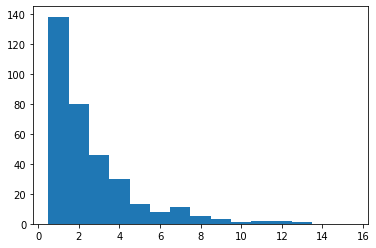

In [140]:
plt.hist(runs, bins = np.linspace(0.5,15.5,16))

In [97]:
nitrate_10.TEMPERATURE_VALUE.notnull().astype(int).groupby(nitrate_10.TEMPERATURE_VALUE.isnull().astype(int).cumsum()).cumsum()

START_TIME
1953-05-31    1
1953-06-07    0
1953-06-14    0
1953-06-21    0
1953-06-28    0
             ..
1984-12-09    0
1984-12-16    0
1984-12-23    1
1984-12-30    0
1985-01-06    1
Name: TEMPERATURE_VALUE, Length: 1650, dtype: int64

In [80]:
nitrate_10['RUN'] = np.nan
nitrate_10.RUN[0] = 0
for i in np.arange(1, len(nitrate_10), 1):
   if (nitrate_10):
    

In [64]:
np.sort((Time_diff/3600/24/1000000000).unique())

array(['NaT',     7,    14,    21,    28,    35,    42,    49,    56,
          63,    70,    77,    84,    91,   140,   161,   350],
      dtype='timedelta64[ns]')

In [61]:
plot_df = nitrate.xs(10).filter(column=['TEMPERATURE_VALUE'])
# plot_df['missing'] = np.where(np.isnan(plot_df.TEMPERATURE_VALUE))
plot_df

TypeError: filter() got an unexpected keyword argument 'columns'

In [ ]:
plot_df.plot(style=['k-.','r*'], figsize=(20, 10))

In [12]:
isdup = nitrate.duplicated(subset=['PRESSURE','START_TIME'], keep=False)
any(nitrate[isdup].duplicated())

False

In [28]:
nitrate.START_TIME

1       1953-05-31
3       1953-05-31
6       1953-05-31
7       1953-05-31
10      1953-06-09
           ...    
13857   1985-01-01
13858   1985-01-01
13859   1985-01-01
13860   1985-01-01
13861   1985-01-01
Name: START_TIME, Length: 10638, dtype: datetime64[ns]

In [29]:
nitrate.index = nitrate.START_TIME

In [20]:
bins = np.linspace(0, 100, 100/4 + 1)
labs = np.linspace(2, 98, 100/4)
bins, labs

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 array([ 2.,  6., 10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.,
        54., 58., 62., 66., 70., 74., 78., 82., 86., 90., 94., 98.]))

In [22]:
nitrate['PRESSURE_BIN'] = pd.cut(nitrate.PRESSURE, bins = bins, labels = labs)

In [ ]:
nitrate = nitrate.groupby('PRESSURE_BIN').resample()

In [254]:
press_binned = bins[np.digitize(nitrate.PRESSURE[nitrate.PRESSURE <= 100], bins, right=True)]
nitrate.insert(2, column = "PRESSURE_BINNED", value = press_binned)

In [229]:
isdup = nitrate.duplicated(subset=['START_TIME', 'PRESSURE'], keep=False)

In [230]:
nitrate[isdup]

,START_TIME,PRESSURE,PRESSURE_BINNED,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
3593,1965-01-05,50.0,50.0,17.88,35.640,2.9,211.30
3594,1965-01-05,75.0,75.0,17.07,35.589,4.9,201.03
3595,1965-01-05,100.0,100.0,15.31,35.460,8.7,183.61
3596,1965-01-13,0.0,0.0,20.24,35.589,0.1,229.62
3601,1965-01-13,50.0,50.0,18.74,35.569,0.9,218.45
3602,1965-01-13,75.0,75.0,17.69,35.529,2.8,201.47
3603,1965-01-13,100.0,100.0,15.68,35.410,8.0,181.37
3609,1965-01-21,50.0,50.0,17.44,35.509,4.4,195.22
3610,1965-01-21,75.0,75.0,15.23,35.380,8.5,191.20
3611,1965-01-21,100.0,100.0,13.70,35.299,11.0,199.69


In [255]:
index_df = nitrate.iloc[:,:3]
index_df

,START_TIME,PRESSURE,PRESSURE_BINNED
1,1953-05-31,10.0,10.0
3,1953-05-31,30.0,30.0
6,1953-05-31,75.0,75.0
7,1953-05-31,100.0,100.0
10,1953-06-09,20.0,20.0
12,1953-06-09,40.0,40.0
13,1953-06-09,50.0,50.0
14,1953-06-09,75.0,75.0
15,1953-06-09,100.0,100.0
24,1953-06-29,0.0,0.0


In [209]:
counts.shape

(339, 3)

In [185]:
grouped = index_df.groupby(by = ['START_TIME','PRESSURE_BINNED'])
# grouped = grouped[grouped[0] > 1]
counts = grouped.filter(lambda x: x['PRESSURE'].count() > 1)
# counts[counts['PRESSURE'] != counts['PRESSURE_BINNED']]

In [256]:
is_dup = index_df.duplicated(subset = ['START_TIME','PRESSURE_BINNED'], keep = False)

In [257]:
index_df[is_dup]

,START_TIME,PRESSURE,PRESSURE_BINNED
3593,1965-01-05,50.0,50.0
3594,1965-01-05,75.0,75.0
3595,1965-01-05,100.0,100.0
3596,1965-01-13,0.0,0.0
3601,1965-01-13,50.0,50.0
3602,1965-01-13,75.0,75.0
3603,1965-01-13,100.0,100.0
3609,1965-01-21,50.0,50.0
3610,1965-01-21,75.0,75.0
3611,1965-01-21,100.0,100.0


## Standardisation

For an LSTM that predicts all columns, we normalise all variables

In [9]:
nitrate.dtypes

PRESSURE               float64
TEMPERATURE_VALUE      float64
TEMPERATURE_QC_FLAG    float64
SALINITY_VALUE         float64
SALINITY_QC_FLAG       float64
NITRATE_VALUE          float64
NITRATE_QC_FLAG        float64
dtype: object

In [88]:
stats = nitrate.describe()
# normalise everything
# stats['NITRATE_VALUE']['mean'] = 0
# stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
PRESSURE,10638.0,44.104512,29.526670,0.000,20.000,40.000,70.000,100.000
PRESSURE_BINNED,10638.0,44.177477,29.572735,0.000,20.000,40.000,70.000,100.000
TEMPERATURE_VALUE,10638.0,17.418458,2.263967,11.600,15.780,17.120,18.790,25.230
TEMPERATURE_QC_FLAG,10638.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,10638.0,35.463542,0.158053,31.924,35.389,35.479,35.556,35.967
SALINITY_QC_FLAG,10638.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
NITRATE_VALUE,10638.0,3.734793,3.640728,0.060,0.700,2.300,6.300,25.800
NITRATE_QC_FLAG,10638.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
OXYGEN_VALUE,10638.0,217.009770,23.267731,109.900,198.350,222.020,234.530,305.120
OXYGEN_QC_FLAG,10638.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [89]:
nitrate = (nitrate - stats['mean'])/stats['std']
nitrate.drop(columns=['PRESSURE','TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG','OXYGEN_QC_FLAG'], inplace=True)
nitrate.insert(0, 'START_TIME', start_time)
nitrate.describe()

,PRESSURE,PRESSURE_BINNED,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE,OXYGEN_VALUE
count,1.063800e+04,1.063800e+04,1.063800e+04,1.063800e+04,1.063800e+04,1.063800e+04
mean,8.015146e-17,5.877774e-17,-3.807195e-16,-9.457873e-15,5.877774e-17,-1.206280e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.493718e+00,-1.493858e+00,-2.570028e+00,-2.239466e+01,-1.009357e+00,-4.603361e+00
25%,-8.163641e-01,-8.175597e-01,-7.237112e-01,-4.716297e-01,-8.335676e-01,-8.019591e-01
50%,-1.390103e-01,-1.412611e-01,-1.318297e-01,9.779954e-02,-3.940951e-01,2.153296e-01
75%,8.770203e-01,8.731868e-01,6.058136e-01,5.849779e-01,7.045862e-01,7.529840e-01
max,1.893051e+00,1.887635e+00,3.450378e+00,3.185371e+00,6.060657e+00,3.786799e+00


In [13]:
start_time[1:10]

1   1953-05-31
2   1953-05-31
3   1953-05-31
4   1953-05-31
5   1953-05-31
6   1953-05-31
7   1953-05-31
8   1953-06-09
9   1953-06-09
Name: START_TIME, dtype: datetime64[ns]

# LSTM

In [13]:
features = nitrate.drop(columns=['START_TIME'])
features.index = nitrate.START_TIME
features.head()

,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
START_TIME,,,,
1953-05-31,-0.974230,0.575475,-0.545575,0.1
1953-05-31,-0.482509,0.661902,0.024266,1.2
1953-05-31,0.623864,-0.072727,0.136982,3.1
1953-05-31,1.238516,-0.461649,0.700561,6.7
1953-06-09,-0.728370,0.316194,-0.432859,0.2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6576c3a20>,
      dtype=object)

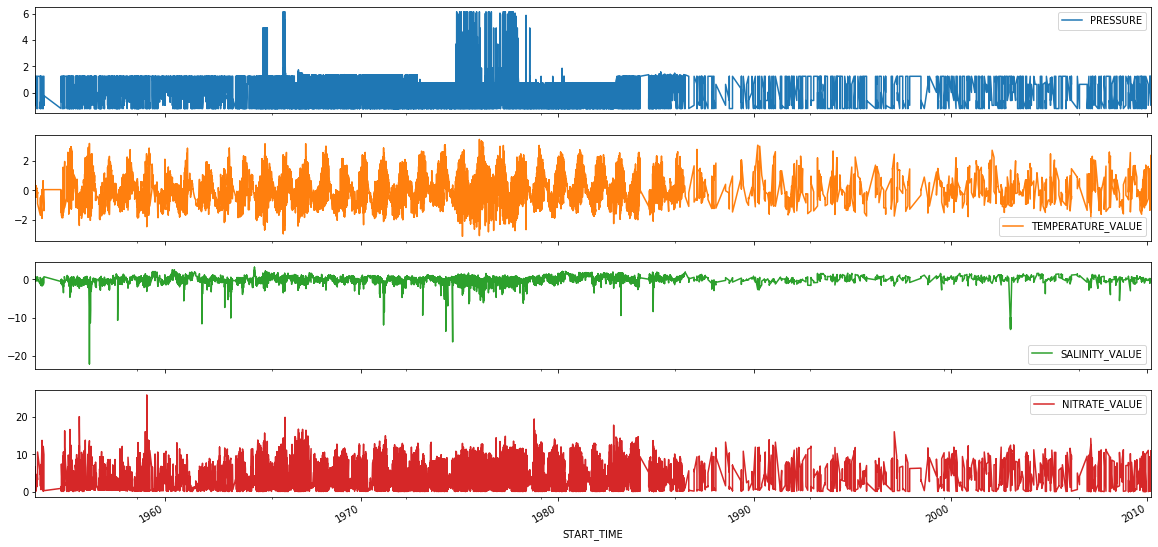

In [15]:
features.plot(subplots=True, figsize=(20,10))

In [16]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)